In [10]:
from rdkit import Chem
from rdkit.Chem import Draw
import MDAnalysis as mda
import prolif as plf
# create a molecule from the MDAnalysis selection
lmol = plf.Molecule.from_mda(lig)
# cleanup before drawing
mol = Chem.RemoveHs(lmol)
mol.RemoveAllConformers()
Draw.MolToImage(mol, size=(400, 200))


AttributeError: 'Mol' object has no attribute 'atoms'

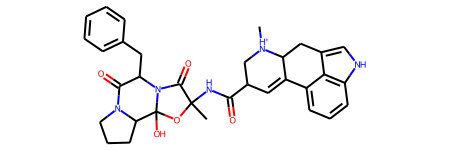

In [8]:
from rdkit import Chem

template = Chem.MolFromSmiles(
    "C[NH+]1CC(C(=O)NC2(C)OC3(O)C4CCCN4C(=O)C(Cc4ccccc4)N3C2=O)C=C2c3cccc4[nH]cc(c34)CC21"
)
template




In [9]:
from prolif.plotting.network import LigNetwork

lmol = plf.Molecule.from_mda(lig)
pmol = plf.Molecule.from_mda(prot)

fp = plf.Fingerprint()
fp.run(u.trajectory[::10], lig, prot)
df = fp.to_dataframe(return_atoms=True)

net = LigNetwork.from_ifp(
    df,
    lmol,
    # replace with `kind="frame", frame=0` for the other depiction
    kind="aggregate",
    threshold=0.3,
    rotation=270,
)
net.display()



AttributeError: 'Mol' object has no attribute 'atoms'

In [6]:
from rdkit import Chem
from rdkit.Chem import rdmolfiles
from prolif.plotting.network import LigNetwork
import MDAnalysis as mda
import prolif
pathlig = "/home/louis/Téléchargements/PROJETISDD/SETDOCK1/results_GNINA/bestsetdock/7djr_Diosmetin_minimized_2023-3-27-14:0best.pdbqt"
def pdbqtreader(path):
    blockdata = ""
    with open(path, "r+") as pdbqt:
        # read a list of lines into data
        pdbqtcontenu = pdbqt.readlines()

    for x in range(len(pdbqtcontenu)):
        if pdbqtcontenu[x][:4] == "ATOM" or pdbqtcontenu[x][:6] == "HETATM":
            templine = pdbqtcontenu[x].split()
            pdbqtcontenu[x] = pdbqtcontenu[x][:-3]
            pdbqtcontenu[x] = pdbqtcontenu[x]+templine[2][:1]+"\n"
            blockdata = blockdata + pdbqtcontenu[x]
            #print(x)
        if pdbqtcontenu[x][:6] == "ENDMDL":
            print("break")
            break
    #print(blockdata)
    mol = Chem.rdmolfiles.MolFromPDBBlock(blockdata,sanitize=False,removeHs=False)
    return mol

lig = pdbqtreader(pathlig)
rec = pdbqtreader("/home/louis/Téléchargements/PROJETISDD/receptors/7djr.pdbqt")

ligtemp = prolif.Molecule(lig)
rectemp = prolif.Molecule(rec)

ligpro = prolif.molecule.pdbqt_supplier(pathlig,lig)
#recpro = prolif.molecule.pdbqt_supplier("/home/louis/Téléchargements/PROJETISDD/receptors/7djr2.pdbqt",rec)

ligpro
#print(len(recpro))

fp = prolif.Fingerprint()
ifp = fp.generate(ligtemp, rectemp, return_atoms=True)
ifp["Frame"] = 0
df = prolif.to_dataframe([ifp],fp.interactions.keys(),return_atoms=True)
net = LigNetwork.from_ifp(
    df,
    ligtemp,
    # replace with `kind="frame", frame=0` for the other depiction
    kind="aggregate",
    threshold=0.3,
    rotation=270,
)
net.display()
#ifp = fp.generate(ligpro,recpro,return_atoms=True)
#fp.run_from_iterable(ligpro,recpro)
##ifp
#df = fp.to_dataframe()
#df

    


/home/louis/miniconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
